In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data file(s)
df = pd.read_csv('Hospital_Data.csv')

In [3]:
# Explore the data
# Display the first few rows of the dataset
print(df.head(11))

    case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0         1              8                  c                   3   
1         2              2                  c                   5   
2         3             10                  e                   1   
3         4             26                  b                   2   
4         5             26                  b                   2   
5         6             23                  a                   6   
6         7             32                  f                   9   
7         8             23                  a                   6   
8         9              1                  d                  10   
9        10             10                  e                   1   
10       11             22                  g                   9   

   Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                     Z                                  3  radiotherapy   
1                  

In [4]:

# Get the dimensions of the dataset (rows, columns)
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 318438
Number of columns: 18


In [5]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
# Generate summary statistics of the DataFrame
df.describe(include='all')
#NaN  - Not a Numbe

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,318438.000000,318438.000000,318438,318438.000000,318438,318438.000000,318438,318438,318438,318325.000000,318438.000000,313906.000000,318438,318438,318438.000000,318438,318438.000000,318438
unique,NaN,NaN,7,NaN,3,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,a,NaN,X,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,41-50,NaN,21-30
freq,NaN,NaN,143425,NaN,133336,NaN,249486,127947,112753,NaN,NaN,NaN,152261,175843,NaN,63749,NaN,87491
mean,159219.500000,18.318841,NaN,4.771717,NaN,3.197627,NaN,NaN,NaN,2.625807,65747.579472,7.251859,NaN,NaN,3.284099,NaN,4880.749392,NaN
std,91925.276847,8.633755,NaN,3.102535,NaN,1.168171,NaN,NaN,NaN,0.873146,37979.936440,4.745266,NaN,NaN,1.764061,NaN,1086.776254,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79610.250000,11.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,2.000000,32847.000000,4.000000,NaN,NaN,2.000000,NaN,4186.000000,NaN
50%,159219.500000,19.000000,NaN,5.000000,NaN,3.000000,NaN,NaN,NaN,3.000000,65724.500000,8.000000,NaN,NaN,3.000000,NaN,4741.000000,NaN
75%,238828.750000,26.000000,NaN,7.000000,NaN,4.000000,NaN,NaN,NaN,3.000000,98470.000000,8.000000,NaN,NaN,4.000000,NaN,5409.000000,NaN


In [7]:
#prints the count of distinct values in multiple columns.
distinct_count = df[['Department', 'Ward_Type', 'Type of Admission', 'Severity of Illness']].nunique()
print(distinct_count)

Department             5
Ward_Type              6
Type of Admission      3
Severity of Illness    3
dtype: int64


In [8]:
# Handle missing values
df.dropna(inplace=True)  # Remove rows with missing values
df.reset_index(drop=True, inplace=True)  # Reset the row index after removing rows

In [9]:
# Replace 'Nov-20' with '11-20' in the 'Age' column
df[['Age', 'Stay']] = df[['Age', 'Stay']].replace('Nov-20', '11-20')

In [10]:
# Handle duplicates
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df.reset_index(drop=True, inplace=True)  # Reset the row index after removing duplicates

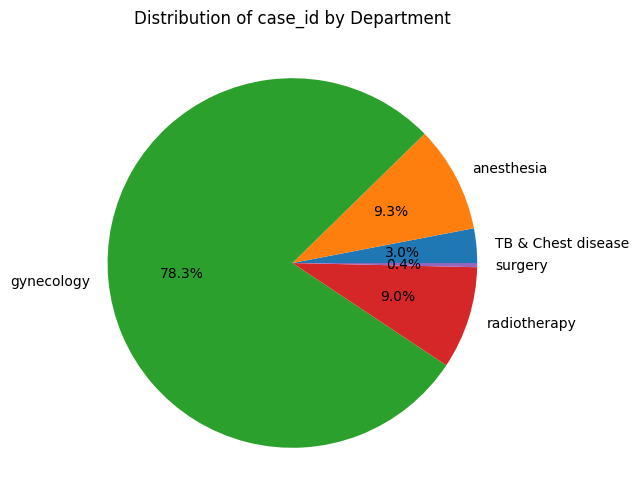

In [11]:
# Group the data by Department and count the number of case_id in each department
department_count = df.groupby('Department')['case_id'].count().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(department_count['case_id'], labels=department_count['Department'], autopct='%1.1f%%')
plt.title('Distribution of case_id by Department')
plt.show()

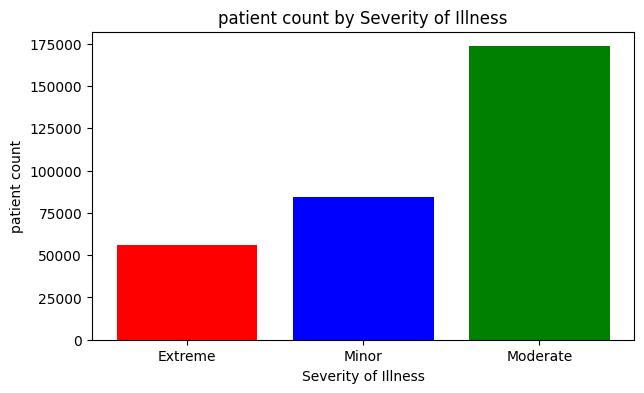

In [12]:
# Group the data by Severity of Illness and calculate the count of distinct case_id values
severity_counts = df.groupby('Severity of Illness')['case_id'].nunique().reset_index()

# Create a bar chart with different colors for each bar
plt.figure(figsize=(7, 4))
plt.bar(severity_counts['Severity of Illness'], severity_counts['case_id'], color=['red', 'blue', 'green'])
plt.xlabel('Severity of Illness')
plt.ylabel('patient count')
plt.title('patient count by Severity of Illness')
plt.show()

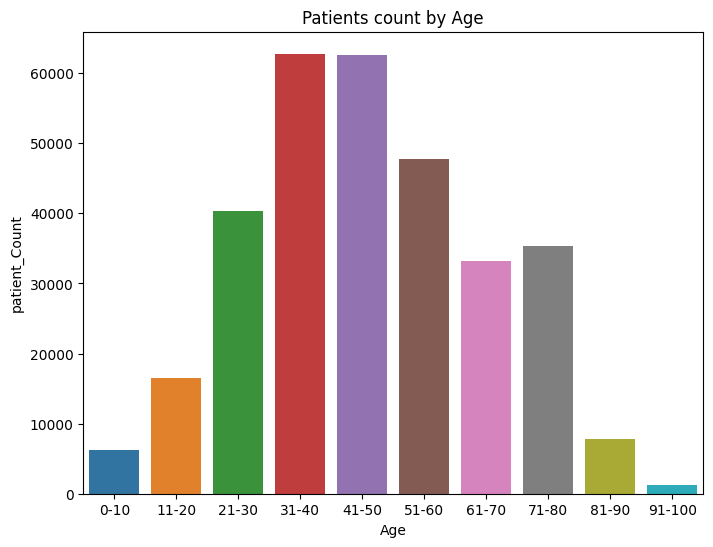

In [13]:
# Sort the 'Age' column in ascending order
df_sorted = df.sort_values('Age')

# Plot the distribution of patients' ages
plt.figure(figsize=(8, 6))
sns.countplot(data=df_sorted, x='Age')
plt.xlabel('Age')
plt.ylabel('patient_Count')
plt.title('Patients count by Age')
plt.show()

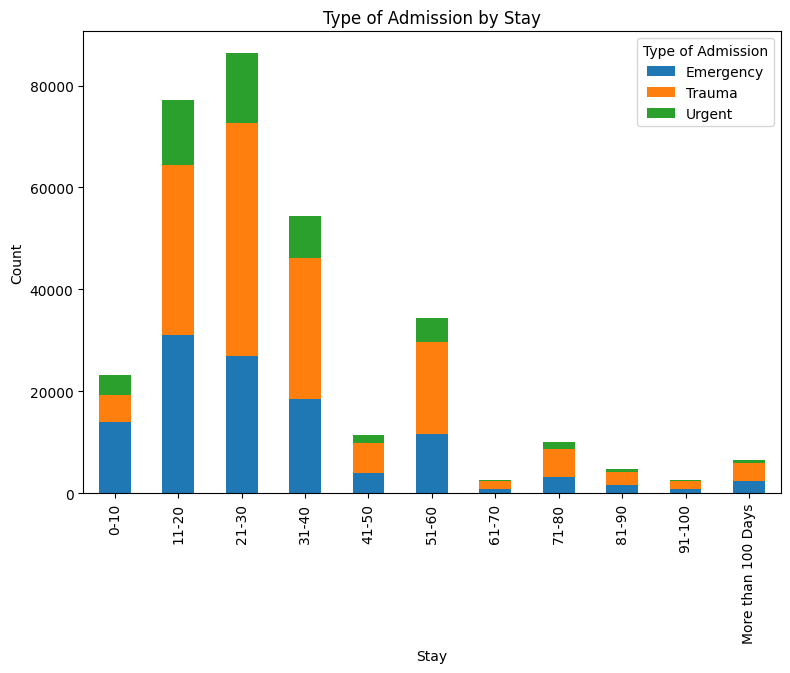

In [14]:
# Group the data by Type of Admission and Stay, and calculate the count of case_id values
admission_stay_counts = df.groupby(['Type of Admission', 'Stay'])['case_id'].count().reset_index()

# Pivot the data to have Type of Admission as columns and Stay as rows
admission_stay_pivot = admission_stay_counts.pivot(index='Stay', columns='Type of Admission', values='case_id')

# Create a stacked bar chart
admission_stay_pivot.plot(kind='bar', stacked=True, figsize=(9, 6))
plt.xlabel('Stay')
plt.ylabel('Count')
plt.title('Type of Admission by Stay')
plt.legend(title='Type of Admission')
plt.show()

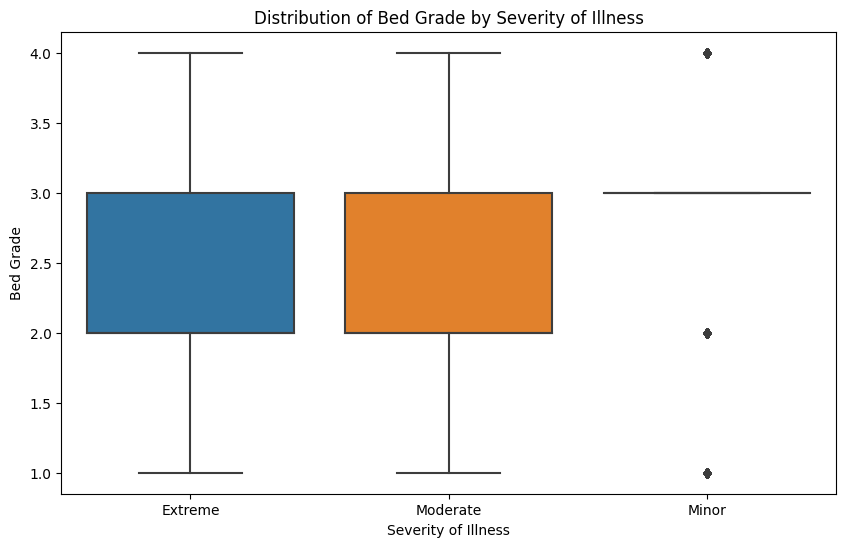

In [15]:
#Boxplot: Distribution of Bed Grade by Severity of Illness.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Severity of Illness', y='Bed Grade')
plt.xlabel('Severity of Illness')
plt.ylabel('Bed Grade')
plt.title('Distribution of Bed Grade by Severity of Illness')
plt.show()

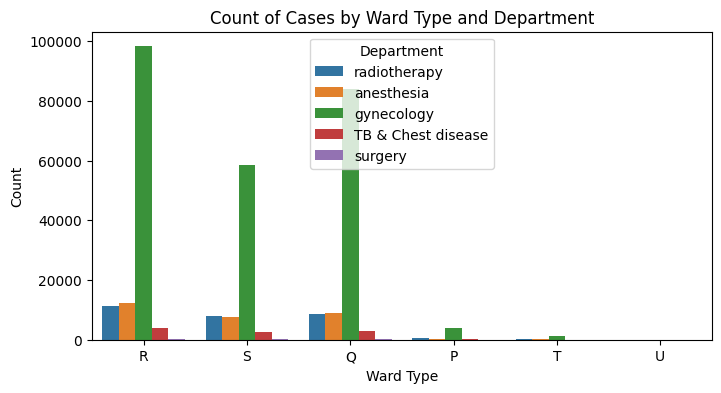

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Ward_Type', hue='Department')
plt.xlabel('Ward Type')
plt.ylabel('Count')
plt.title('Count of Cases by Ward Type and Department')
plt.legend(title='Department')
plt.show()

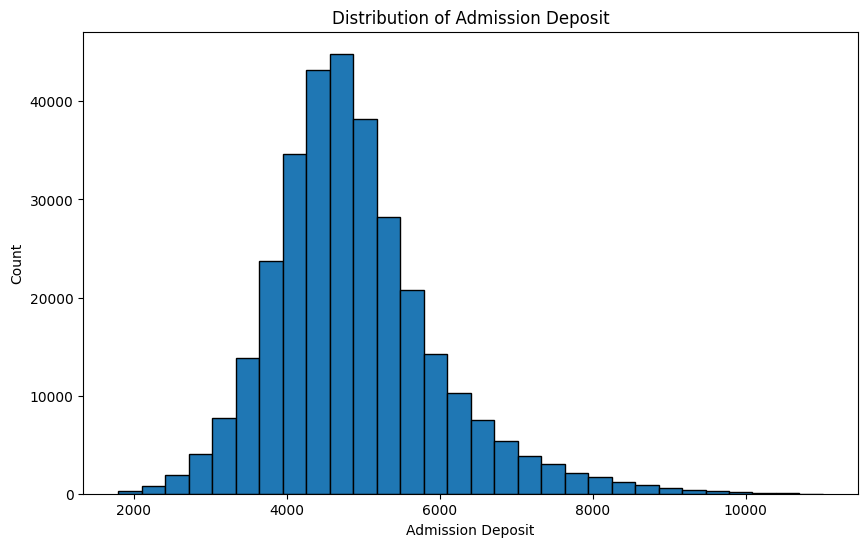

In [17]:
#Histogram: Distribution of Admission Deposit
plt.figure(figsize=(10, 6))
plt.hist(df['Admission_Deposit'], bins=30, edgecolor='black')
plt.xlabel('Admission Deposit')
plt.ylabel('Count')
plt.title('Distribution of Admission Deposit')
plt.show()

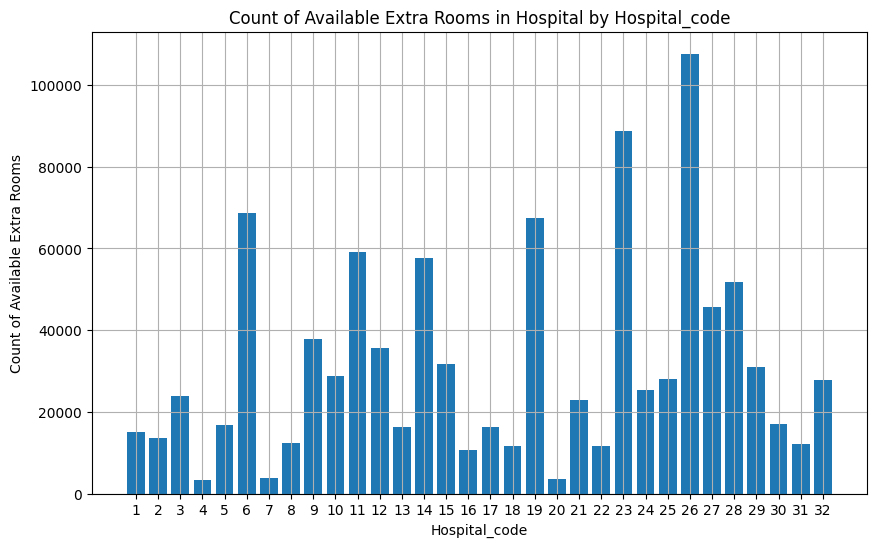

In [18]:
# Group the data by Hospital_code and calculate the sum of Available Extra Rooms in Hospital for each hospital
rooms_count = df.groupby('Hospital_code')['Available Extra Rooms in Hospital'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(rooms_count['Hospital_code'], rooms_count['Available Extra Rooms in Hospital'])
plt.xlabel('Hospital_code')
plt.ylabel('Count of Available Extra Rooms')
plt.title('Count of Available Extra Rooms in Hospital by Hospital_code')
plt.xticks(rooms_count['Hospital_code'])
plt.grid(True)
plt.show()

# Insights:

Patient Admissions:

Trauma admissions accounted for the highest percentage of patients, indicating a significant demand for trauma-related services in the hospital.
A small fraction of trauma admissions required stays exceeding 100 days, suggesting complex cases and the need for long-term care.
Prolonged stays were also observed in emergency and urgent admissions, highlighting the importance of efficient care delivery for these patients.
Gynecology cases showed moderate volume and severity, indicating a consistent but manageable workload.


Illness Severity:

Patients with moderate illnesses constituted a larger proportion compared to those with extreme or minor conditions. This suggests a need for adequate resources and care plans tailored to different illness severities.


Admission Types:

Trauma admissions were frequent, indicating the hospital's role as a key provider for trauma-related emergencies.
Urgent admissions were relatively lower, which could indicate effective primary care or lower urgency levels among patients.


Ward Distribution:

Ward R recorded the highest number of cases among the five wards, signaling the need for targeted resource allocation and staffing in that specific ward.


Hospital Utilization:

Hospital type code A had the highest number of rooms, surpassing other types. This finding provides valuable insights for effective resource utilization and capacity planning.


Conclusion:

The analysis of hospital admissions data uncovered key insights for hospital operations and patient care. The findings revealed a high percentage of trauma admissions, highlighting the need for specialized trauma services. Prolonged stays were observed in trauma, emergency, and urgent admissions, underscoring the importance of efficient care delivery. Patients with moderate illnesses constituted a significant proportion, emphasizing the need for tailored resources and care plans. Ward R recorded the highest number of cases, calling for targeted resource allocation. Hospital type code A possessed the most rooms, providing insights for optimizing resource utilization. These findings enable hospitals to allocate resources effectively, enhance patient care, and improve overall operational efficiency.